In [1]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [2]:
def rand_towers_coord(nump):
    for i in range (0, 10):
        for j in range (1,3):
            nump[i,j]=random.randint(0, 100)
    return nump

def calc_dist(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if dist == 0: dist = 1
    return dist



### TASK 1
Определить собственную рекурсивную процедуру вычисления факториала числа.

In [3]:
def fac(n):
    if n == 0:
        return 1
    return fac(n-1) * n

fac(4)

24

### TASK 2
Имеется квадратная область размером 100х100 точек и телекоммуникационные вышки трех уровней мощности: P(1)=100 единиц (5 штук), P(2)=300 единиц (3 штуки) и P(3)=500 единиц (2 штуки). Плотность населения в каждой ячейке области задается матрицей C размером 100х100 точек. Реализовать процедуру случайного размещения телекоммуникационных вышек на заданной области. Полагаем, что мощность сигнала в каждой ячейке вычисляется по формуле:P(i,j,k) = P(k)/(D*D), где i,j - строка и столбец ячейки, k - тип коммуникационной вышки (1, 2, 3), D - расстояние между ячейкой (i,j) и ячейкой, где расположена вышка. Итоговая мощность сигнала в ячейке определяется максимальной мощностью сигналов от всех вышек.<br>
а) Отобразить на экране двумерную карту мощности сигнала (цветом показывать мощность);<br>
б) Подсчитать суммарное кол-во абонентов, имеющих удовлетворительное качество связи (мощность сигнала >1).

Number of people with good connection: 231815 of 242397. (96%)


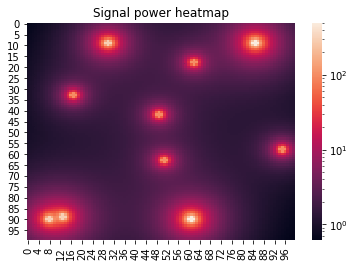

In [4]:
matrix = np.zeros((100, 100))
density = np.random.randint(50, size=(100, 100))
population = density.sum()
towers = np.array([[100,0,0],[100,0,0],[100,0,0],[100,0,0],[100,0,0],[300,0,0],[300,0,0],[300,0,0],[500,0,0],[500,0,0]])

rand_towers_coord(towers)

        
towers = pd.DataFrame(towers, columns = ['Power', 'x', 'y'])

for i in range (0, 100):
    for j in range (0,100):
        for k in range (0, 10):
            matrix[i,j]=matrix[i,j] + (towers['Power'][k]/(calc_dist(i, j, towers['x'][k], towers['y'][k])**2))
        if matrix[i,j]<=1: density[i,j]=0
            
fig = sns.heatmap(matrix, norm=LogNorm());
fig.set(title = "Signal power heatmap");
print(f'Number of people with good connection: {density.sum()} of {population}. ({round(density.sum()/population*100)}%)')

### TASK 3
Дана матрица M размера 15х15 точек. Матрица заполнена нулями, но ряд элементов в ней равен единице (отличные от нуля элементы задаются вручную путем присваивания, т.е. M[[10,5]]=1). Известно, что при обходе ненулевых элементов по кругу следуя вдоль строк или столбцов можно вернуться в исходную точку (т.е. точки образуют цикл). Реализовать процедуры:<br>
а) поиска любого ненулевого элемента в матрице как стартовой точки обхода цикла;<br>
б) поиска всех промежуточных вершин цикла, вывести их на печать. Пример: Старт: (3,2) -> (3,13) -> (5,13) -> (5,15) -> (10,15) -> (10, 2) -> (3,2) Конец

In [5]:
def hor_search(matrix, matrix_of_visits, i, j):
    left, right = j, j
    while (left > 0) or (right < matrix.shape[1]-1):
        if right+1 < matrix.shape[1]:
            right = right + 1
            if matrix[i,right]==1 and matrix_of_visits[i,right]==1:
                matrix_of_visits[i,right]=0
                return right
        if left-1 > -1:
            left = left - 1
            if matrix[i,left]==1 and matrix_of_visits[i,left]==1:
                matrix_of_visits[i,left]=0
                return left
    return -1
    
            
def ver_search(matrix, matrix_of_visits, i, j):
    up, down = i, i
    while (up > 0) or (down < matrix.shape[0]-1):
        if down+1 < matrix.shape[1]:
            down = down + 1
            if matrix[down, j]==1 and matrix_of_visits[down,j]==1:
                matrix_of_visits[down,j]=0
                return down
        if up-1 > -1:
            up = up - 1
            if matrix[up, j]==1 and matrix_of_visits[up, j]==1:
                matrix_of_visits[up, j]=0
                return up
    return -1

def find_1(matrix):
    i, j = 0, 0
    for i in range (0, matrix.shape[1]):
        for j in range (0,matrix.shape[0]):
            if matrix[i, j] == 1:
                return(i, j)

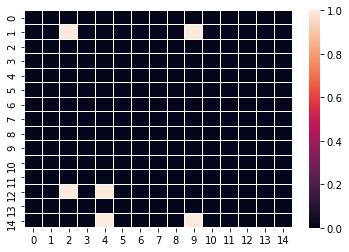

In [6]:
#создаем матрицу
matrix = np.zeros((15, 15))
matrix[1,2] = 1
matrix[12,2] = 1
matrix[12,4] = 1
matrix[14,4] = 1
matrix[14,9] = 1
matrix[1,9] = 1

# matrix[1,1] = 1
# matrix[1,4] = 1
# matrix[3,4] = 1
# matrix[3,8] = 1
# matrix[1,8] = 1
# matrix[1,13] = 1
# matrix[12,13] = 1
# matrix[12,2] = 1
# matrix[10,2] = 1
# matrix[10,1] = 1
#fix that shit ↑

matrix_of_visits = matrix.copy()

sns.heatmap(matrix, linewidths=.01);

In [7]:
#ищем 1 в матрице
i, j = find_1(matrix)
    
starti, startj = i, j
matrix_of_visits[i, j]=0

print(f'({i},{j})')
#пока есть непосещенные точки на графике:
while matrix_of_visits.sum()>0:
    temp = hor_search(matrix, matrix_of_visits, i, j)
    if temp != -1:
        j = temp
    else:
        temp = ver_search(matrix, matrix_of_visits, i, j)
        if temp != -1:
            i = temp
    print(f'({i},{j})')
print(f'({starti},{startj})')

(1,2)
(1,9)
(14,9)
(14,4)
(12,4)
(12,2)
(1,2)
